In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from graph import *
from dampers import *
from data import *
from roll import *

/Users/janniezhong/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# 2023 car
# front_track = 46.89*25.4 #mm
# sprung_weight=613.9 #lb -- an assumption
# rear_track =45.374*25.4 #mm
# front_IR = 1.064 #spring/wheel
# rear_IR=0.9033 #spring/wheel
# wheelbase = 61 #in
# front_wt_dist=0.499
# # rch=2 #in, roll center height
# front_rch = 30.785/25.4 # in, front roll center height
# rear_rch = 15.763/25.4 # in, rear roll center height
# b = front_wt_dist*wheelbase
# a = wheelbase-b

# tot_weight = 713.9 #lb
# cgh = 9.831 #in
# center_rch = (abs(rear_rch-front_rch)/wheelbase)*b + rear_rch # watch out for signs here -- this works because our rear roll center is lower than the front

# date = "4_28"

In [3]:
# 2018 (?) car

front_track = 48*25.4 #mm
sprung_weight=217.72*2.2 #lb
rear_track =46*25.4 #mm
front_IR = 1.33 #spring/wheel
wheelbase = 61 #in
rear_IR=0.9 #spring/wheel
front_wt_dist=0.455
rch=2 #in, roll center height
rear_rch=2
front_rch=2
tot_weight = 589 #lb
cgh = 12.2 #in

b = front_wt_dist*wheelbase
a = wheelbase-b
center_rch = (abs(rear_rch-front_rch)/wheelbase)*b + rear_rch # watch out for signs here -- this works because our rear roll center is lower than the front
date = "4_28"

In [4]:
# pre-processing
y_cols = ["Time","Acceleration X", "Acceleration Y", "Acceleration Z", "Damper Pos FL", "Damper Pos FR", "Damper Pos RL", "Damper Pos RR", "Wheel Speed FL", "Wheel Speed FR", "Wheel Speed RL", "Wheel Speed RR", "Steering Wheel Angle"]
df = process_data('4_21_autoX.csv', y_cols)
data_to_float(df)

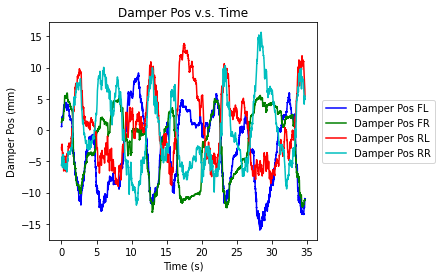

In [5]:
# for offset dampers
# ZERO offset		 <- 4/28
# FL	3.15	mm
# FR	1.45	mm
# RL	-1.12	mm
# RR	-2.65	mm

# for offset dampers
# ZERO offset		
# FL	-1.97	mm
# FR	-0.76	mm
# RL	4.82	mm
# RR	-1.79	mm

#apply_damper_offset(df, 3.15, 1.45, -1.12, -2.65)
apply_damper_offset(df, -1.97, -0.76, 4.82, -1.79)

calc_damper_travel(df)
calc_wheel_travel(df, front_IR, rear_IR)
# graph damper position
graph_damper_pos(df)

# wheel center v.s. time

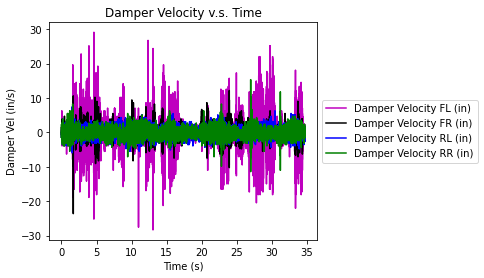

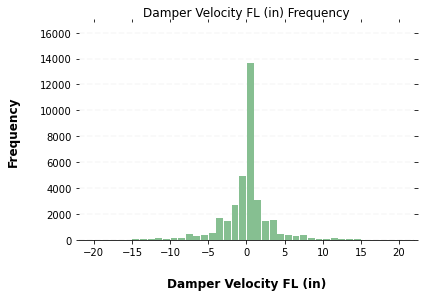

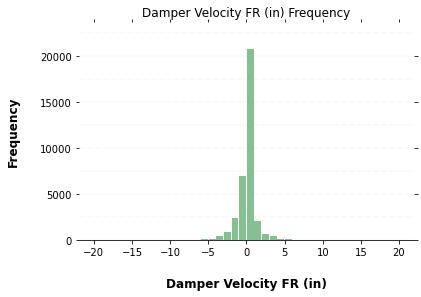

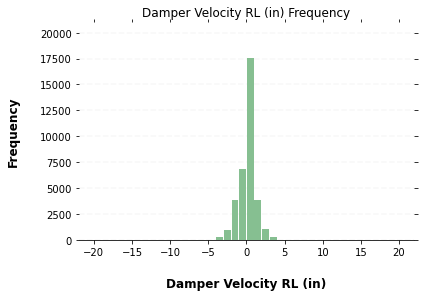

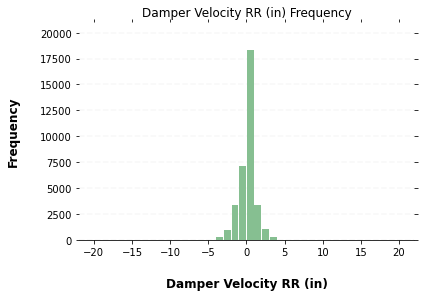

In [6]:
# damper/wheel center velocity v.s. time
calc_damper_velocity(df)
graph_damper_vel(df)
# histograms for damper velocity
graph_damper_vel_hist(df)

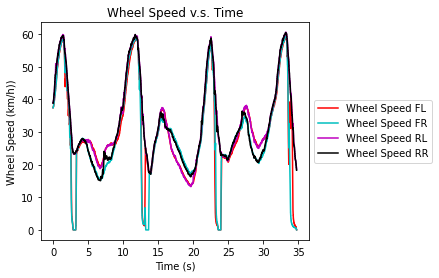

In [7]:
# wheel speed v.s. time
# might need to add virtual channel to convert this to km/h
graph_wheel_speed(df)

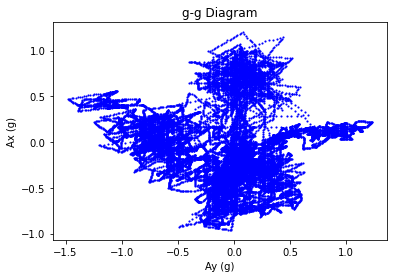

In [8]:
# g-g diagram
graph_gg(df)

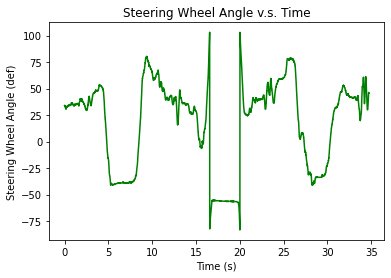

In [9]:
# steering
graph_steer(df)

In [10]:
# throttle

In [11]:
# brake

In [12]:
# vehicle speed

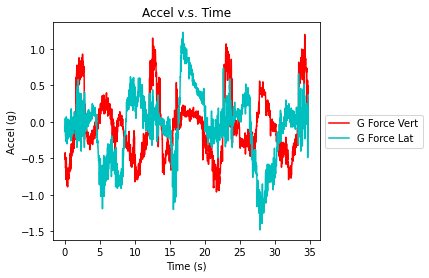

In [13]:
# Ax and Ay vs. time
graph_a(df)

front roll gradient (left turn, right turn): [2.14102534] [2.00687013]
rear roll gradient (left turn, right turn): [1.66853405] [1.52401825]
total roll gradient (left turn, right turn): [1.9047797] [1.76544419]
front roll stiffness (left turn, right turn): [120.1274447] [131.07540842]
rear roll stiffness (left turn, right turn): [93.61716893] [99.53873525]
total roll stiffness (left turn, right turn): [213.74461363] [230.61414367]


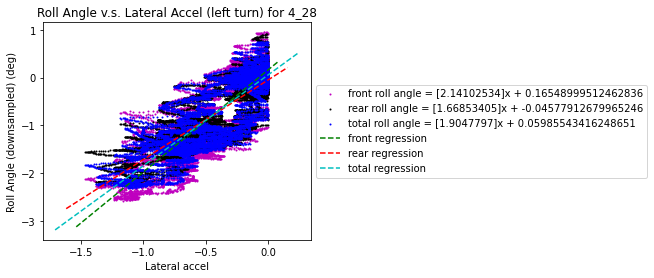

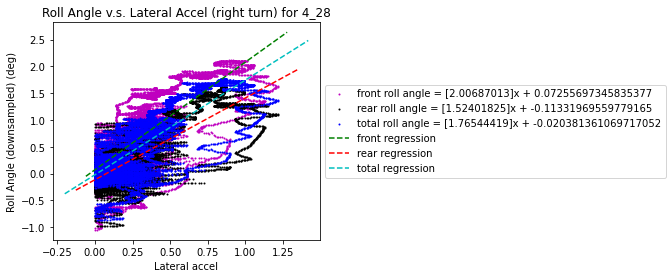

In [14]:
#roll :)
calc_roll_angle(df, front_track, rear_track)
graph_rollvtime(df)
df_downsampled = filter_downsample_rollangle(df)
# left turns
l_front_rg, l_rear_rg, l_total_rg = graph_left_turn_roll(df_downsampled, date)

# right turns
r_front_rg, r_rear_rg, r_total_rg = graph_right_turn_roll(df_downsampled, date)
print("front roll gradient (left turn, right turn):", l_front_rg, r_front_rg)
print("rear roll gradient (left turn, right turn):", l_rear_rg, r_rear_rg)
print("total roll gradient (left turn, right turn):", l_total_rg, r_total_rg)

# roll stiffness
m_roll = calc_roll_moment(cgh, center_rch, sprung_weight)
KfrontL, KrearL, KtotL = calc_roll_stiffness(m_roll, l_front_rg, l_rear_rg, l_total_rg)
KfrontR, KrearR, KtotR = calc_roll_stiffness(m_roll, r_front_rg, r_rear_rg, r_total_rg)

print("front roll stiffness (left turn, right turn):", KfrontL, KfrontR)
print("rear roll stiffness (left turn, right turn):", KrearL, KrearR)
print("total roll stiffness (left turn, right turn):", KtotL, KtotR)